# Big Data
## starting the spark

In [1]:
!pip install findspark

In [2]:
import findspark

In [3]:
findspark.init("C:\spark")

In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [5]:
spark=SparkSession.builder \
    .master("local") \
    .appName("spark") \
    .getOrCreate()
    
sc=spark.sparkContext

In [6]:
sc

<SparkContext master=local appName=spark>

In [7]:
sc.version

'3.3.0'

In [8]:
sc.appName

'spark'

In [9]:
#sc.stop()

### basic data frame operations

In [10]:
spark_df=spark.read.csv("./churn.csv", header=True, inferSchema=True)

In [11]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [12]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [13]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [14]:
import seaborn as sns
df=sns.load_dataset("diamonds")

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [18]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [19]:
spark_df.dtypes

[('_c0', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int')]

In [20]:
df.ndim

2

In [21]:
spark_df.ndim

AttributeError: 'DataFrame' object has no attribute 'ndim'

In [22]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [23]:
spark_df.show(3, truncate=True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [24]:
spark_df.count()

900

In [25]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [26]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [27]:
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [28]:
spark_df.select("Age","Names").show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [29]:
spark_df.filter(spark_df.Age>40).count()

524

In [30]:
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [31]:
spark_df.groupby("Churn").agg({"Age":"mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



### sql operations

In [32]:
spark_df.createOrReplaceTempView("tbl_df")

In [33]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [34]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |   tbl_df|       true|
+---------+---------+-----------+



In [35]:
spark.sql("select Age from tbl_df").show()

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
|48.0|
|44.0|
|32.0|
|43.0|
|40.0|
|30.0|
|45.0|
|45.0|
|40.0|
|41.0|
|38.0|
|45.0|
|43.0|
|53.0|
|46.0|
+----+
only showing top 20 rows



In [36]:
spark.sql("select Age from tbl_df").show(5)

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
+----+
only showing top 5 rows



In [37]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



### big data visualization

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
sns.barplot(x = "Churn", y=spark_df.Churn.index, data=spark_df)

AttributeError: 'DataFrame' object has no attribute 'get'

In [40]:
sdf=spark_df.toPandas()

In [41]:
sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


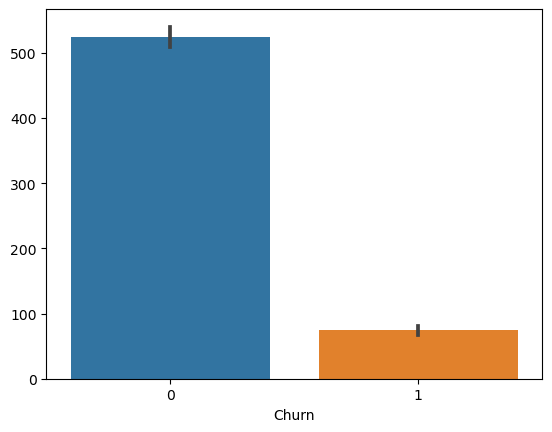

In [42]:
sns.barplot(x = "Churn", y=sdf.Churn.index, data=sdf);

In [43]:
#we will be more comfortable if the data is reduced. we translated and visualized pandas df

In [44]:
a=spark_df.groupby("Churn").count().toPandas()

In [45]:
a

,Churn,count
0,1,150
1,0,750


In [46]:
type(a)

pandas.core.frame.DataFrame

### machine learning and data preprocessing

In [47]:
spark_df=spark.read.csv("./churn.csv", header=True, inferSchema=True)
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [48]:
spark_df= spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [49]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [50]:
spark_df=spark_df.withColumnRenamed("_c0","index")

In [51]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [52]:
spark_df.count()

900

In [53]:
len(spark_df.columns)

8

In [54]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [55]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [56]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").show()

+----+--------------+---------------+-----+---------+-----+
| age|total_purchase|account_manager|years|num_sites|churn|
+----+--------------+---------------+-----+---------+-----+
|42.0|       11066.8|              0| 7.22|      8.0|    1|
|41.0|      11916.22|              0|  6.5|     11.0|    1|
|38.0|      12884.75|              0| 6.67|     12.0|    1|
|42.0|       8010.76|              0| 6.71|     10.0|    1|
|37.0|       9191.58|              0| 5.56|      9.0|    1|
|48.0|      10356.02|              0| 5.12|      8.0|    1|
|44.0|      11331.58|              1| 5.23|     11.0|    1|
|32.0|       9885.12|              1| 6.92|      9.0|    1|
|43.0|       14062.6|              1| 5.46|     11.0|    1|
|40.0|       8066.94|              1| 7.11|     11.0|    1|
|30.0|      11575.37|              1| 5.22|      8.0|    1|
|45.0|       8771.02|              1| 6.64|     11.0|    1|
|45.0|       8988.67|              1| 4.84|     11.0|    1|
|40.0|       8283.32|              1|  5

In [57]:
# we will model whether the customer will leave or not

In [58]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [59]:
spark_df =spark_df.dropna()

In [60]:
# we get rid of incomplete observations

In [61]:
spark_df=spark_df.withColumn("age_squared",spark_df.age**2)
#variably produced

In [62]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|     1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
only showing top 3 rows



In [63]:
# specifying the dependent variable

In [64]:
from pyspark.ml.feature import StringIndexer

In [65]:
stringIndexer=StringIndexer(inputCol="churn",outputCol="label")
mod=stringIndexer.fit(spark_df)
indexed=mod.transform(spark_df)
spark_df=indexed.withColumn("label",indexed["label"].cast("integer"))

In [66]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|     1444.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+
only showing top 3 rows



In [67]:
# specifying independent variables

In [68]:
from pyspark.ml.feature import VectorAssembler

In [69]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_squared',
 'label']

In [70]:
independent_variables=["age","total_purchase","account_manager","years","num_sites"]

In [71]:
vectorAssembler=VectorAssembler(inputCols=independent_variables, outputCol="features")
va_df= vectorAssembler.transform(spark_df)

In [72]:
va_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+--------------------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|label|            features|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+--------------------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|    1|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|    1|[41.0,11916.22,0....|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|     1444.0|    1|[38.0,12884.75,0....|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+--------------------+
only showing top 3 rows



In [73]:
last_df=va_df.select(["features","label"])

In [74]:
last_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
+--------------------+-----+
only showing top 3 rows



In [75]:
#test_train

In [76]:
splits=last_df.randomSplit([0.70,0.30])
train_df=splits[0]
test_df=splits[1]

In [77]:
train_df

DataFrame[features: vector, label: int]

In [78]:
test_df

DataFrame[features: vector, label: int]

### customer abandonment modeling using gbm

In [79]:
from pyspark.ml.classification import GBTClassifier

In [80]:
gbm=GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [81]:
gbm_model=gbm.fit(train_df)

In [82]:
sc

<SparkContext master=local appName=spark>

In [83]:
y_pred=gbm_model.transform(test_df)

In [84]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [85]:
ac=y_pred.select("label","prediction")

In [86]:
ac.filter(ac.label==ac.prediction).count()/ac.count()
#we will compare the real and estimated values and count true false and calculate the accuracy to increase the ac

0.8450704225352113

### model tuning

In [87]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator=BinaryClassificationEvaluator()

paramGrid=(ParamGridBuilder()
           .addGrid(gbm.maxDepth,[2,4,6])
           .addGrid(gbm.maxBins,[20,30])
           .addGrid(gbm.maxIter,[10,20])
           .build())

cv=CrossValidator(estimator=gbm, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)

In [88]:
cvModel=cv.fit(train_df)

In [89]:
y_pred=cvModel.transform(test_df)

In [90]:
ac=y_pred.select("label","prediction")

In [91]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8802816901408451

In [92]:
# will the new customer leave or not

In [93]:
import pandas as pd

names=pd.Series(["Murat Karahan","Elif Yamac","Enes Gokdemir","Eren Torun","Ertugrul Yerlikaya"])
age=pd.Series([45,20,21,20,20])
total_purchase=pd.Series([30000,10000,60000,30000,100000])
account_manager=pd.Series([1,0,0,1,1])
years=pd.Series([20,10,3,8,3])
num_sites=pd.Series([30,8,8,6,50])

new_customer=pd.DataFrame({

    'names':names,
    'age':age,
    'total_purchase':total_purchase,
    'account_manager':account_manager,
    'years':years,
    'num_sites':num_sites})

new_customer.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [94]:
new_sdf=spark.createDataFrame(new_customer)

In [95]:
new_sdf.show()

+------------------+---+--------------+---------------+-----+---------+
|             names|age|total_purchase|account_manager|years|num_sites|
+------------------+---+--------------+---------------+-----+---------+
|     Murat Karahan| 38|         30000|              1|   20|       30|
|        Elif Yamac| 53|         10000|              0|   10|        8|
|     Enes Gokdemir| 34|          6000|              0|    3|        8|
|        Eren Torun| 50|         30000|              1|    8|        6|
|Ertugrul Yerlikaya| 40|        100000|              1|   30|       50|
+------------------+---+--------------+---------------+-----+---------+



In [96]:
new_customer=vectorAssembler.transform(new_sdf)

In [97]:
results=cvModel.transform(new_customer)

In [98]:
results.select("names","prediction").show()

+------------------+----------+
|             names|prediction|
+------------------+----------+
|     Murat Karahan|       1.0|
|        Elif Yamac|       0.0|
|     Enes Gokdemir|       0.0|
|        Eren Torun|       0.0|
|Ertugrul Yerlikaya|       1.0|
+------------------+----------+



In [99]:
# the model was translated into a vector and independent and dependent variable estimation was performed